## Prédire l'apparition de maladies cardiaques

# **Introduction**

##### **Cardiovascular Disease Dataset**
- **Source** : [Kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data)
- **Sujet** : Les maladies cardiovasculaires
- **Taille** : 70 000 lignes x 14 colonnes
- **Questions** : Prédire et identifier les facteurs favorisant les crises cardiaques.
- **Description** : C'est le premier ensemble de données que nous avons trouvé, et il est presque parfait, ne présentant aucune donnée manquante.


# **Partie 1 : Importation des bibliothèques et chargement des données**

Dans cette section, nous importons les bibliothèques nécessaires et chargeons les données du jeu de données "Cardiovascular Disease". Ces bibliothèques sont essentielles pour effectuer l'analyse des données.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA


**Chargement du jeu de données** : Le jeu de données "Cardiovascular Disease" contient un total de 70000 lignes, où chaque ligne représente un patient. Il est composé de 13 attributs médicaux.


In [2]:
df = pd.read_csv('data/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Partie 2 : Description des Données**

---



## **Attributs du jeu de données** :


    age : L'âge du patient en années. Il s'agit d'un attribut numérique qui permet de déterminer la tranche d'âge des patients.

    gender : Le genre du patient (1 pour femme, 2 pour homme). Cet attribut catégorique permet de différencier les patients par genre.

    height : La taille du patient en centimètres. C'est un attribut numérique essentiel pour évaluer la morphologie des patients.

    weight : Le poids du patient en kilogrammes. Cet attribut numérique est important pour évaluer la composition corporelle des patients.

    ap_hi : La pression artérielle systolique. Cet attribut numérique est essentiel pour évaluer la santé cardiovasculaire.

    _lo** : La pression artérielle diastolique. Cet attribut numérique complète l'évaluation de la pression artérielle.

    cholesterol : Le niveau de cholestérol (1 pour normal, 2 pour élevé, 3 pour très élevé). C'est un attribut catégorique important pour évaluer la santé cardiaque.

    gluc : Le niveau de glucose (1 pour normal, 2 pour élevé, 3 pour très élevé). Cet attribut catégorique est essentiel pour évaluer les niveaux de sucre dans le sang.

    smoke : Le statut de fumeur (0 pour non-fumeur, 1 pour fumeur). C'est un attribut catégorique qui peut être lié aux problèmes cardiovasculaires.

    alco : La consommation d'alcool (0 pour non buveur, 1 pour buveur). Cet attribut catégorique est lié aux habitudes de consommation d'alcool des patients.

    active : Le niveau d'activité physique (0 pour inactif, 1 pour actif). Cet attribut catégorique reflète le niveau d'exercice physique des patients.

    cardio : La présence de maladie cardiovasculaire (0 pour absent, 1 pour présent). Cet attribut catégorique est la variable cible de notre analyse.




## **Taille du jeu de données :**

    Le jeu de données contient un total de 70 000 exemples.
    Il y a 13 colonnes, chacune contenant des informations sur les patients.





## **Données manquantes :**

    Il n'y a pas de données manquantes dans ce jeu de données.

La prochaine partie du rapport inclura des visualisations et des analyses exploratoires pour mieux comprendre ce jeu de données médicales.

## **Question que l'on peut se poser sur CardioVascular**

Le premier ensemble de données provient de Kaggle et se concentre sur les maladies cardiovasculaires. Composé de 70 000 lignes et 14 colonnes, cet ensemble est presque parfait, dépourvu de toute donnée manquante. Les questions abordées dans cette analyse incluent l'identification des principaux facteurs de risque, la corrélation entre l'âge et les crises cardiaques, et l'impact du tabagisme sur la santé cardiovasculaire.

- Quels sont les principaux facteurs de risque identifiés dans le dataset pour les maladies cardiovasculaires?
- Existe-t-il une corrélation significative entre l'âge et la prédisposition aux crises cardiaques?
- Quels sont les attributs les plus influents dans la prédiction des crises cardiaques?
- Y a-t-il une différence significative entre les sexes en termes de prévalence des maladies cardiovasculaires?
- Comment les niveaux de cholestérol et de pression artérielle sont-ils liés aux crises cardiaques?
- Existe-t-il une relation entre le tabagisme et les maladies cardiovasculaires dans ce dataset?
- Quels sont les groupes d'âge les plus vulnérables aux maladies cardiovasculaires d'après les données?
- La présence de diabète est-elle fortement associée aux cas de maladies cardiovasculaires?
- Comment la répartition géographique des participants est-elle liée aux maladies cardiovasculaires?
- Quel est le rôle de l'activité physique dans la prévention des crises cardiaques selon ce dataset?

# **Partie 3 : Graphiques et Visualisations**

Dans cette section, nous allons générer des graphiques et des visualisations pour mieux comprendre le jeu de données sur les maladies cardiovasculaires. Chaque graphique sera accompagné d'une explication détaillée.


## **Visualisation de l'âge des patients**

Commençons par examiner la répartition de l'âge des patients. Pour ce faire, nous créons un histogramme de l'âge des patients.

In [3]:
print(df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


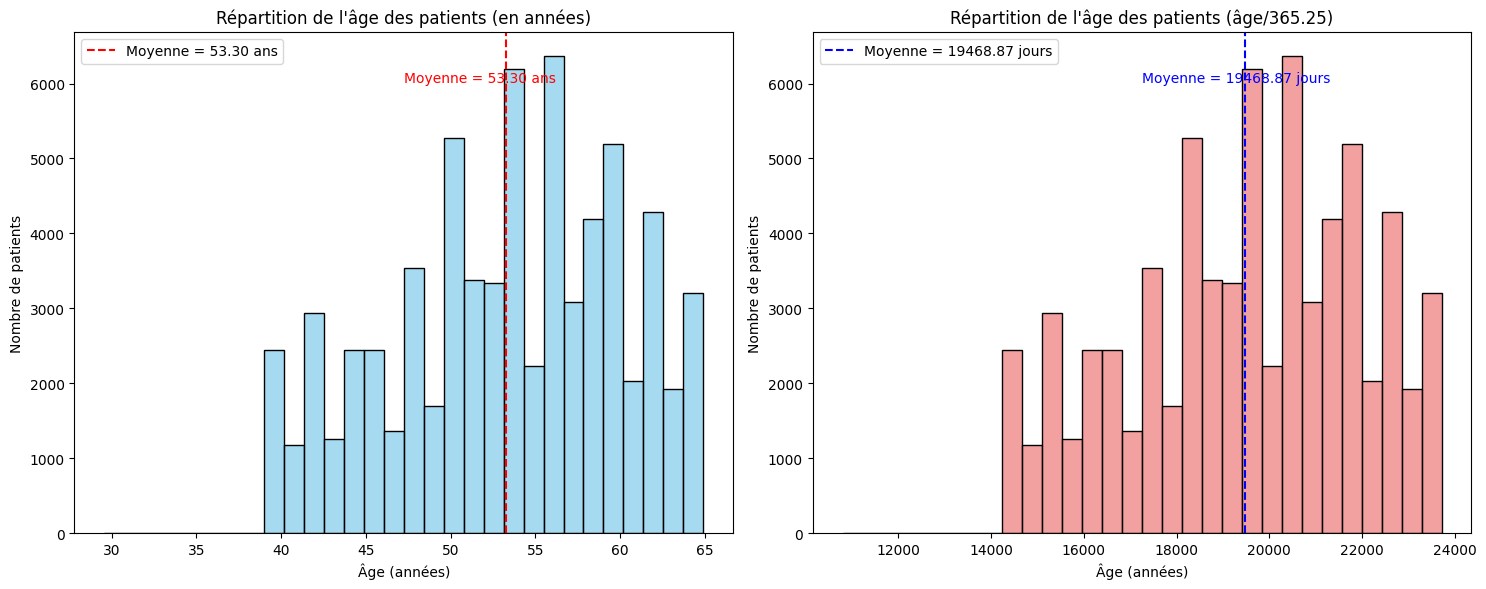

In [4]:
# Calculer la moyenne de l'âge des patients
mean_age = df['age'].mean()
mean_age_years = mean_age / 365.25

# Créer un subplot avec deux graphiques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Premier graphique : Répartition de l'âge des patients en années
sns.histplot(df['age'] / 365.25, bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title("Répartition de l'âge des patients (en années)")
axes[0].set_xlabel("Âge (années)")
axes[0].set_ylabel("Nombre de patients")

# Ajouter une ligne verticale pour la moyenne et afficher la valeur moyenne
axes[0].axvline(mean_age_years, color='red', linestyle='--', label=f'Moyenne = {mean_age_years:.2f} ans')
axes[0].legend()

# Deuxième graphique : Répartition de l'âge des patients en années (âge/365.25)
sns.histplot(df['age'], bins=30, kde=False, color='lightcoral', ax=axes[1])
axes[1].set_title("Répartition de l'âge des patients (âge/365.25)")
axes[1].set_xlabel("Âge (années)")
axes[1].set_ylabel("Nombre de patients")

# Ajouter une ligne verticale pour la moyenne et afficher la valeur moyenne
axes[1].axvline(mean_age, color='blue', linestyle='--', label=f'Moyenne = {mean_age:.2f} jours')
axes[1].legend()

# Afficher la valeur moyenne en tant que texte
axes[0].text(0.5, 0.9, f'Moyenne = {mean_age_years:.2f} ans', color='red', transform=axes[0].transAxes)
axes[1].text(0.5, 0.9, f'Moyenne = {mean_age:.2f} jours', color='blue', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


Nous disposons des âges des individus en jours, en tenant compte d'une année de 365,25 jours. Notre analyse révèle que les individus de ce jeu de données ont des âges compris entre 40 ans et 65 ans, avec un âge moyen de 53,3 ans. Il est important de noter qu'aucun individu de moins de 40 ans n'a été inclus dans l'échantillon, ce qui indique que la majorité des personnes sondées sont âgées de 40 ans ou plus.

C:\Users\talla\AppData\Local\Temp\ipykernel_14668\3477270111.py:12: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = age_cardio_percentage[['Crise Cardiovasculaire (%)', 'Sans Crise Cardiovasculaire (%)']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca(), color=['red', 'green'])


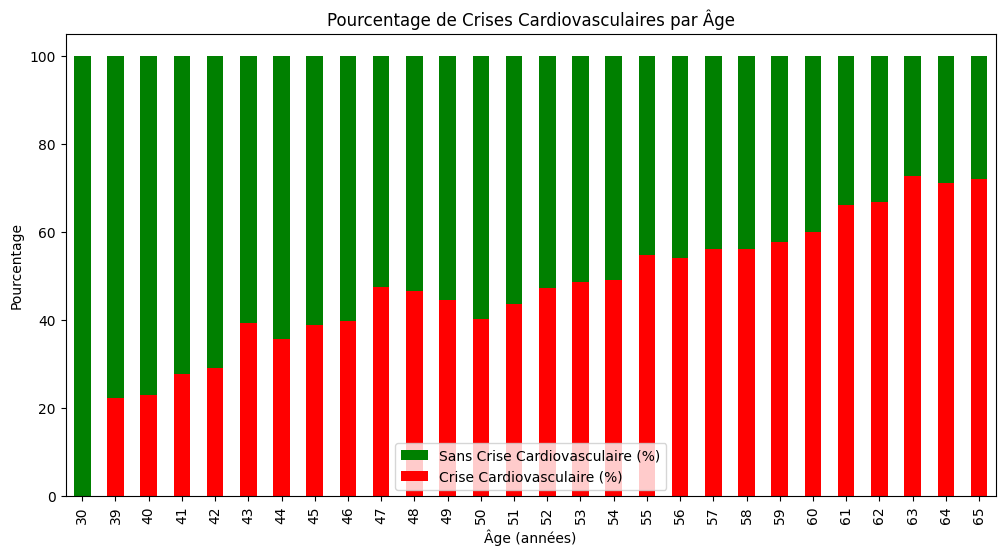

In [5]:
# Arrondir l'âge à l'entier le plus proche
df['age_rounded'] = (df['age'] / 365.25).round(0).astype(int)

# Calculer le pourcentage de crises cardiaques et non-crise cardiaque par âge
age_cardio_percentage = df.groupby(['age_rounded', 'cardio']).size().unstack('cardio').fillna(0)
age_cardio_percentage['Total'] = age_cardio_percentage.sum(axis=1)
age_cardio_percentage['Crise Cardiovasculaire (%)'] = (age_cardio_percentage[1] / age_cardio_percentage['Total']) * 100
age_cardio_percentage['Sans Crise Cardiovasculaire (%)'] = (age_cardio_percentage[0] / age_cardio_percentage['Total']) * 100

# Créer le graphique en barres empilées avec couleurs personnalisées
plt.figure(figsize=(12, 6))
ax = age_cardio_percentage[['Crise Cardiovasculaire (%)', 'Sans Crise Cardiovasculaire (%)']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca(), color=['red', 'green'])

plt.xlabel("Âge (années)")
plt.ylabel("Pourcentage")
plt.title("Pourcentage de Crises Cardiovasculaires par Âge")

# Personnaliser la légende
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()

Nous tentons de réaliser une étude sur le risque de subir une crise cardiaque en fonction de l'âge.

Nous constatons que linéairement, les individus âgés de 39 à 47 ans ont de plus en plus de chances d'être atteints d'une maladie cardiaque à mesure qu'ils vieillissent. Cette tendance se stabilise ensuite avant de connaître une nouvelle augmentation, dépassant ainsi le pourcentage de chances de rencontrer une personne ayant déjà subi une crise cardiaque.

In [6]:
  

# Regrouper les données par âge arrondi et compter le nombre d'occurrences
age_counts = df['age_rounded'].value_counts().reset_index()
age_counts.columns = ['Age (années arrondies)', 'Nombre de personnes']

# Trier le tableau par âge en années arrondies en ordre croissant
age_counts = age_counts.sort_values(by='Age (années arrondies)')

# Réindexer le tableau après le tri
age_counts = age_counts.reset_index(drop=True)

# Afficher le tableau des personnes par âge en années arrondies en ordre croissant
print(age_counts)

    Age (années arrondies)  Nombre de personnes
0                       30                    4
1                       39                  470
2                       40                 2676
3                       41                  777
4                       42                 2602
5                       43                  733
6                       44                 2805
7                       45                  790
8                       46                 2923
9                       47                  793
10                      48                 3167
11                      49                 1123
12                      50                 5242
13                      51                 1377
14                      52                 5279
15                      53                 1460
16                      54                 5961
17                      55                 1584
18                      56                 5944
19                      57              

Nous constatons que le plus jeune âge parmi les individus sondés est de 30 ans, et il y a un total de 4 personnes ayant cet âge. Il s'agit de l'âge minimum observé dans notre échantillon

## **Répartitions des sexes**

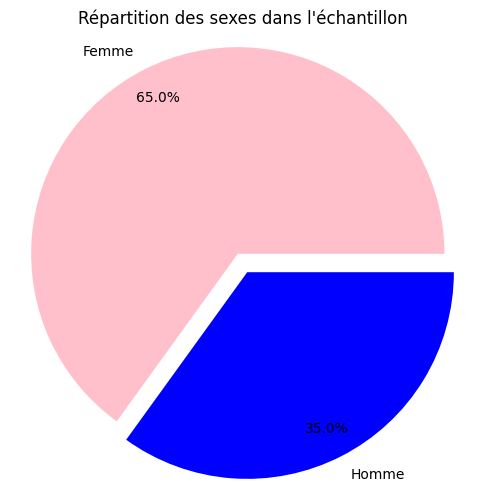

In [7]:
# Compter le nombre de femmes et d'hommes
gender_counts = df['gender'].value_counts()

# Créer un camembert avec le texte à l'extérieur
plt.figure(figsize=(6, 6))
colors = ['pink', 'blue']
labels = ['Femme', 'Homme']
explode = (0.1, 0)  # Pour séparer légèrement le secteur "Femme"
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
plt.title("Répartition des sexes dans l'échantillon")
plt.axis('equal')  # Pour que le camembert soit un cercle

plt.show()

Notre objectif est d'analyser la répartition des sexes parmi les individus sondés. Ce camembert révèle une disparité marquée, avec environ deux tiers de femmes et un tiers d'hommes, indiquant ainsi que les femmes sont deux fois plus nombreuses parmi les sondés.

## **Impact du genre sur les maladies cardiovasculaires**

Analysons maintenant l'impact du genre sur la présence de maladies cardiovasculaires. Nous utilisons deux  graphique en camenbert pour montrer la répartition des maladies cardiovasculaires par genre.

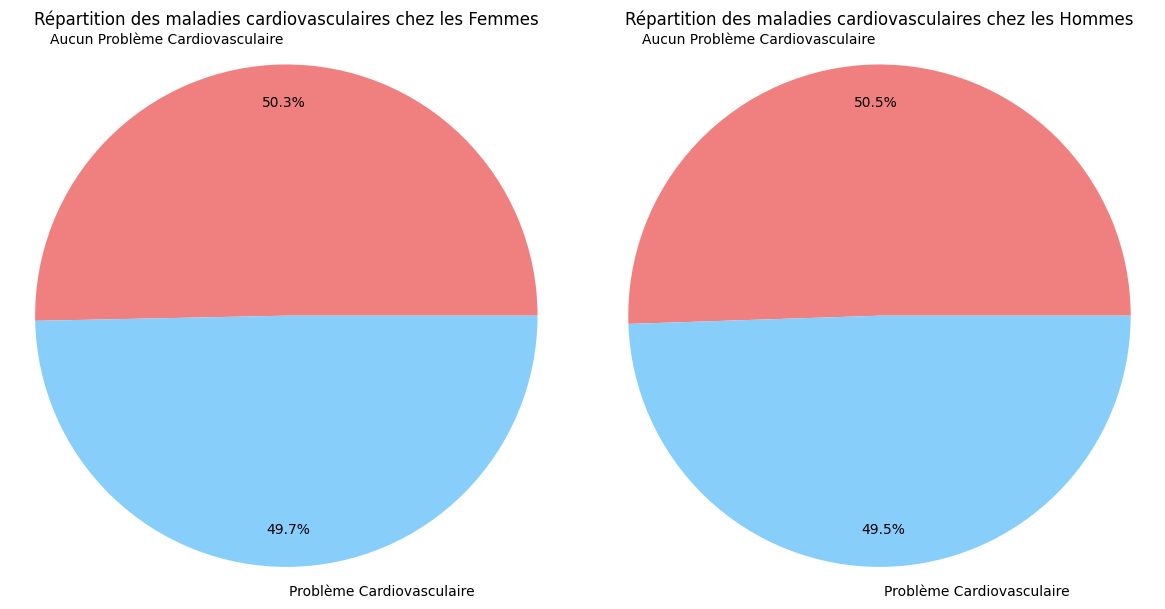

In [8]:

# Séparer les données en fonction du genre (homme ou femme)
df_femmes = df[df['gender'] == 1]
df_hommes = df[df['gender'] == 2]

# Compter le nombre de femmes avec ou sans maladie cardiovasculaire
femmes_cardio_counts = df_femmes['cardio'].value_counts()
femmes_labels = ['Aucun Problème Cardiovasculaire', 'Problème Cardiovasculaire']

# Compter le nombre d'hommes avec ou sans maladie cardiovasculaire
hommes_cardio_counts = df_hommes['cardio'].value_counts()
hommes_labels = ['Aucun Problème Cardiovasculaire', 'Problème Cardiovasculaire']

# Créer un subplot avec deux camemberts
plt.figure(figsize=(12, 6))

# Camembert pour les femmes
plt.subplot(1, 2, 1)
colors = ['lightcoral', 'lightskyblue']
plt.pie(femmes_cardio_counts, labels=femmes_labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.gca().set_title("Répartition des maladies cardiovasculaires chez les Femmes", pad=20)  # Ajout de l'espace entre le titre et le camembert
plt.axis('equal')

# Camembert pour les hommes
plt.subplot(1, 2, 2)
colors = ['lightcoral', 'lightskyblue']
plt.pie(hommes_cardio_counts, labels=hommes_labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.gca().set_title("Répartition des maladies cardiovasculaires chez les Hommes", pad=20)  # Ajout de l'espace entre le titre et le camembert
plt.axis('equal')

plt.tight_layout()  # Pour éviter que les camemberts se chevauchent

# Afficher le subplot
plt.show()

Lors de l'analyse graphique, il semblerait que l'on puisse tirer les conclusions suivantes. Il est pertinent de noter qu'une légère disparité existe entre les femmes et les hommes en ce qui concerne le nombre d'individus ayant ou n'ayant pas connu de crises cardiovasculaires. Par conséquent, il est possible de conclure que les femmes présentent une légère prédisposition à développer des problèmes cardiovasculaires.

Toutefois, il convient de prendre en compte que l'échantillon étudié comprend deux fois plus de femmes que d'hommes. Cette déséquilibre dans la composition de l'échantillon peut influencer les résultats. Par conséquent, nous considérons que les hommes et les femmes ont une probabilité équivalente de subir une crise cardiaque, soit un pourcentage de 1/2 chacun.

## **Niveaux de cholestérol et de glucose**

Examinons maintenant les niveaux de cholestérol et de glucose chez les patients. Nous utilisons un nuage de points pour montrer ces niveaux.

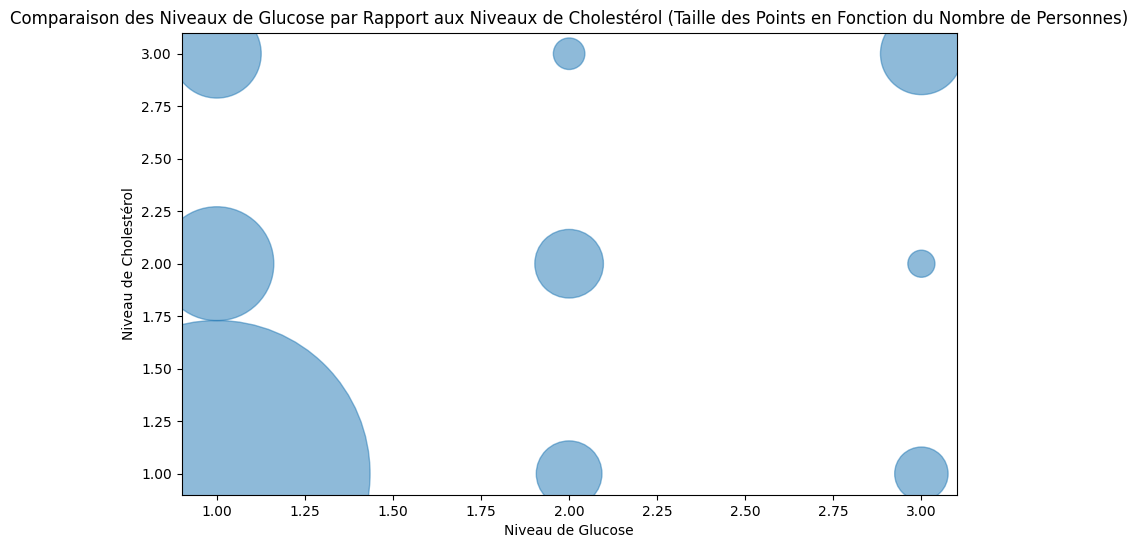

In [9]:
# Groupement des données par les niveaux de glucose et de cholestérol et comptage du nombre de personnes
grouped_data = df.groupby(['gluc', 'cholesterol']).size().reset_index(name='count')

# Créer un nuage de points avec des variations de la taille des points en fonction du nombre de personnes
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['gluc'], grouped_data['cholesterol'], s=grouped_data['count'], alpha=0.5)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel("Niveau de Glucose")
plt.ylabel("Niveau de Cholestérol")
plt.title("Comparaison des Niveaux de Glucose par Rapport aux Niveaux de Cholestérol (Taille des Points en Fonction du Nombre de Personnes)")

plt.show()

Nous pouvons ainsi constater que la majorité des individus présentent des niveaux de cholestérol et de glucose normaux. Environ la même densité de cas se retrouve pour les combinaisons de niveaux élevés-élevés, normaux-élevés, et normaux-très élevés.

Une proportion plus importante concerne les combinaisons élevés-normaux, très élevés-normaux, et très élevés-très élevés.

En revanche, une minorité d'individus présente les combinaisons très élevés-élevés et élevés-très élevés.

Cela reflète la diversité des profils de niveaux de glucose et de cholestérol au sein de l'échantillon.

## **Impact de la consommation d'alcool et du tabagisme sur les maladies cardiovasculaires**

Nous allons analyser la relation entre le tabagisme, la consommation d'alcool et les problèmes cardiaques.

Pour commencer, nous allons examiner le nombre d'individus en fonction de leur consommation de tabac, d'alcool ou des deux.

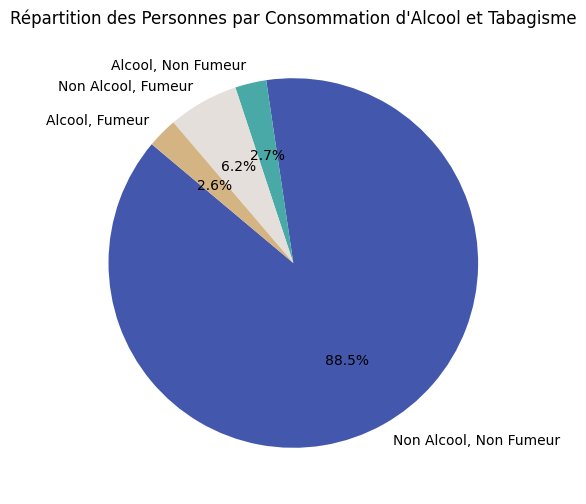

In [10]:
# Filtrer les données en fonction de la consommation d'alcool et du tabagisme
df_non_alco_nonsmoke = df[(df['alco'] == 0) & (df['smoke'] == 0)]
df_alco_nonsmoke = df[(df['alco'] == 1) & (df['smoke'] == 0)]
df_non_alco_smoke = df[(df['alco'] == 0) & (df['smoke'] == 1)]
df_alco_smoke = df[(df['alco'] == 1) & (df['smoke'] == 1)]

# Compter le nombre de personnes dans chaque groupe
counts = [len(df_non_alco_nonsmoke), len(df_alco_nonsmoke), len(df_non_alco_smoke), len(df_alco_smoke)]
labels = ['Non Alcool, Non Fumeur', 'Alcool, Non Fumeur', 'Non Alcool, Fumeur', 'Alcool, Fumeur']

# Couleurs spécifiées
colors = ['#4357AD', '#48A9A6', '#E4DFDA', '#D4B483']

# Créer un graphique en camembert avec les couleurs spécifiées
plt.figure(figsize=(12, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Répartition des Personnes par Consommation d'Alcool et Tabagisme")

plt.show()

Ainsi, nous observons qu'une majorité de personnes ne consomme ni tabac ni alcool, avec près de 9 personnes sur 10 ne pratiquant aucune de ces habitudes.

Une observation intéressante réside dans le fait que parmi les personnes qui consomment de l'alcool, presque la totalité d'entre elles consomment également du tabac, comme en témoignent les chiffres : alcool - non-fumeur = 2.7 et alcool fumeur = 2.6. On peut également remarquer que les consommateurs d'alcool et de tabac constituent un sous-ensemble des non-consommateurs d'alcool et des non-fumeurs.

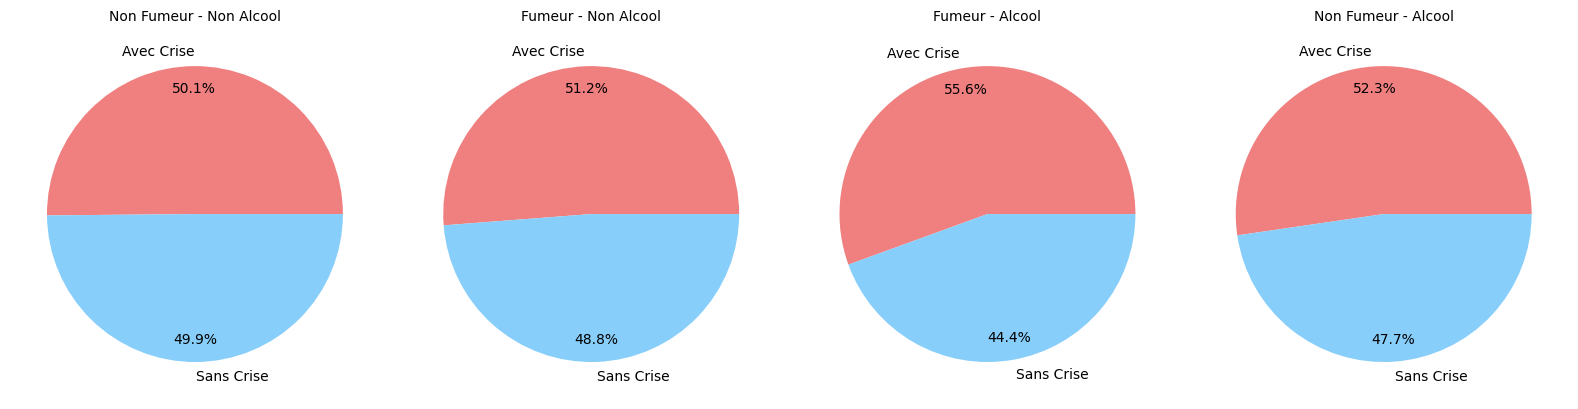

In [11]:
# Créer un subplot avec 1 ligne et 4 colonnes
plt.figure(figsize=(16, 4))

# Catégorie 1 : Non fumeur - Non Alcool
plt.subplot(1, 4, 1)
non_fumeur_non_alcool = df[(df['smoke'] == 0) & (df['alco'] == 0)]
counts = non_fumeur_non_alcool['cardio'].value_counts()
labels = ['Avec Crise', 'Sans Crise']
colors = ['lightcoral', 'lightskyblue']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Non Fumeur - Non Alcool", fontsize=10)

# Catégorie 2 : Fumeur - Non Alcool
plt.subplot(1, 4, 2)
fumeur_non_alcool = df[(df['smoke'] == 1) & (df['alco'] == 0)]
counts = fumeur_non_alcool['cardio'].value_counts()
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Fumeur - Non Alcool", fontsize=10)

# Catégorie 3 : Fumeur - Alcool
plt.subplot(1, 4, 3)
fumeur_alcool = df[(df['smoke'] == 1) & (df['alco'] == 1)]
counts = fumeur_alcool['cardio'].value_counts()
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Fumeur - Alcool", fontsize=10)

# Catégorie 4 : Non fumeur - Alcool
plt.subplot(1, 4, 4)
non_fumeur_alcool = df[(df['smoke'] == 0) & (df['alco'] == 1)]
counts = non_fumeur_alcool['cardio'].value_counts()
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Non Fumeur - Alcool", fontsize=10)

plt.tight_layout()  # Pour éviter que les camemberts se chevauchent

# Afficher le subplot
plt.show()


Nous avons donc quatre camemberts qui illustrent quatre situations différentes :

- Pour la première situation, "Non fumeur - Non alcool", nous pouvons observer que les chances de subir une crise cardiaque ou de ne pas en subir sont équivalentes, soit 50% pour chacune des deux possibilités.

- Dans le cas de "Fumeur - Non alcool", nous observons une légère augmentation du nombre de crises, d'environ 1%.

- De même, "Non fumeur - Alcool" présente également une légère augmentation d'environ 2%.

- Enfin, pour les consommateurs de tabac et d'alcool, nous constatons une augmentation plus significative, d'environ 6%.

Ainsi, nous pouvons conclure que la consommation d'alcool et de tabac est associée à une augmentation du pourcentage de crises cardiaques, bien que ce pourcentage reste modéré, sans être ni trop faible ni excessif.

## **Visualisation de la pression artérielle systolique et prétraitement**

Toutes les données sont de nature numérique, de ce côté, tout est correct. Cependant, une observation graphique des variables ap_hi et ap_ho a révélé une dispersion excessive. Nous avons entrepris d'identifier l'origine des erreurs, sachant que les fautes de frappe ne peuvent être corrigées que partiellement, en particulier les valeurs comportant des chiffres superflus.

Les valeurs négatives ont été rectifiées en appliquant la valeur absolue. Nous avons également identifié d'autres erreurs liées à des conversions d'unités incorrectes ou à l'ajout de zéros superflus. Nous avons défini les intervalles à corriger ainsi que la méthode, comme illustré dans les équations suivantes :



\begin{equation}
\text{ap}_{\text{hi}} =
\begin{cases}
x & \text{si } x \leq 250 \\
\frac{x}{10} & \text{sinon}
\end{cases}
\end{equation}



\begin{equation}
\text{ap}_{\text{lo}} =
\begin{cases}
x & \text{si } x \leq 250 \\
\frac{x}{10} & \text{sinon}
\end{cases}
\end{equation}



\begin{equation}
\text{ap}_{\text{hi}} =
\begin{cases}
x & \text{si } x \leq 1700 \\
\frac{x}{100} & \text{sinon}
\end{cases}
\end{equation}



\begin{equation}
\text{ap}_{\text{lo}} =
\begin{cases}
x & \text{si } x \leq 1700 \\
\frac{x}{100} & \text{sinon}
\end{cases}
\end{equation}


Ces ajustements ont été effectués pour améliorer la qualité des données et garantir la cohérence des mesures.


Voici un premier aperçu.

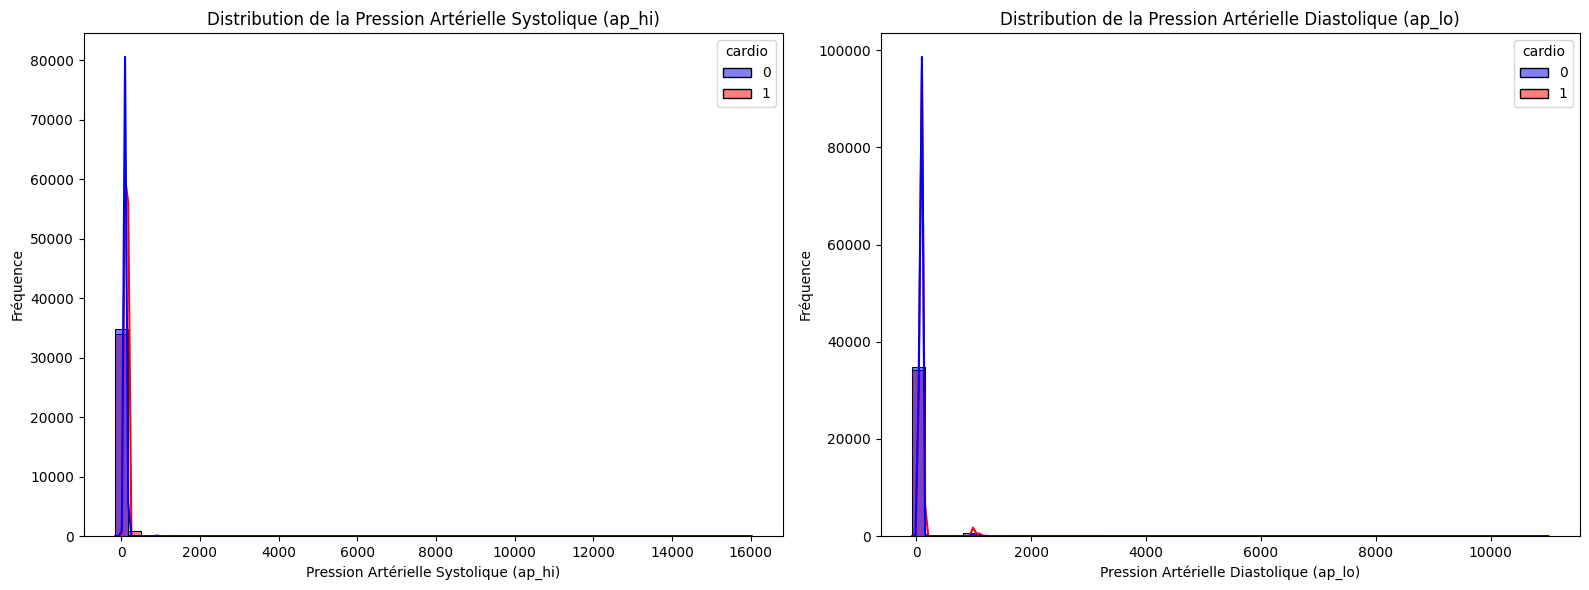

In [12]:
# Créer une figure avec un subplot 1x2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tracer l'histogramme de la pression artérielle systolique (ap_hi)
sns.histplot(data=df, x='ap_hi', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel('Pression Artérielle Systolique (ap_hi)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la Pression Artérielle Systolique (ap_hi)')

# Tracer l'histogramme de la pression artérielle diastolique (ap_lo)
sns.histplot(data=df, x='ap_lo', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[1])
axes[1].set_xlabel('Pression Artérielle Diastolique (ap_lo)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution de la Pression Artérielle Diastolique (ap_lo)')

plt.tight_layout()
plt.show()

Ce graphique est incompréhensible. Nous observons des valeurs extrêmes qui étirent considérablement le graphique. Après notre correction, voici le résultat :

In [13]:
# Première exécution des modifications
df['ap_hi'] = df['ap_hi'].abs()
df['ap_lo'] = df['ap_lo'].abs()
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_hi'] = df['ap_hi'].round(2)
df['ap_lo'] = df['ap_lo'].round(2)

# Deuxième exécution des modifications pour s'assurer que les valeurs sont correctes
df['ap_hi'] = df['ap_hi'].abs()
df['ap_lo'] = df['ap_lo'].abs()
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_hi'] = df['ap_hi'].round(2)
df['ap_lo'] = df['ap_lo'].round(2)

# Vous avez maintenant les données modifiées après deux exécutions.


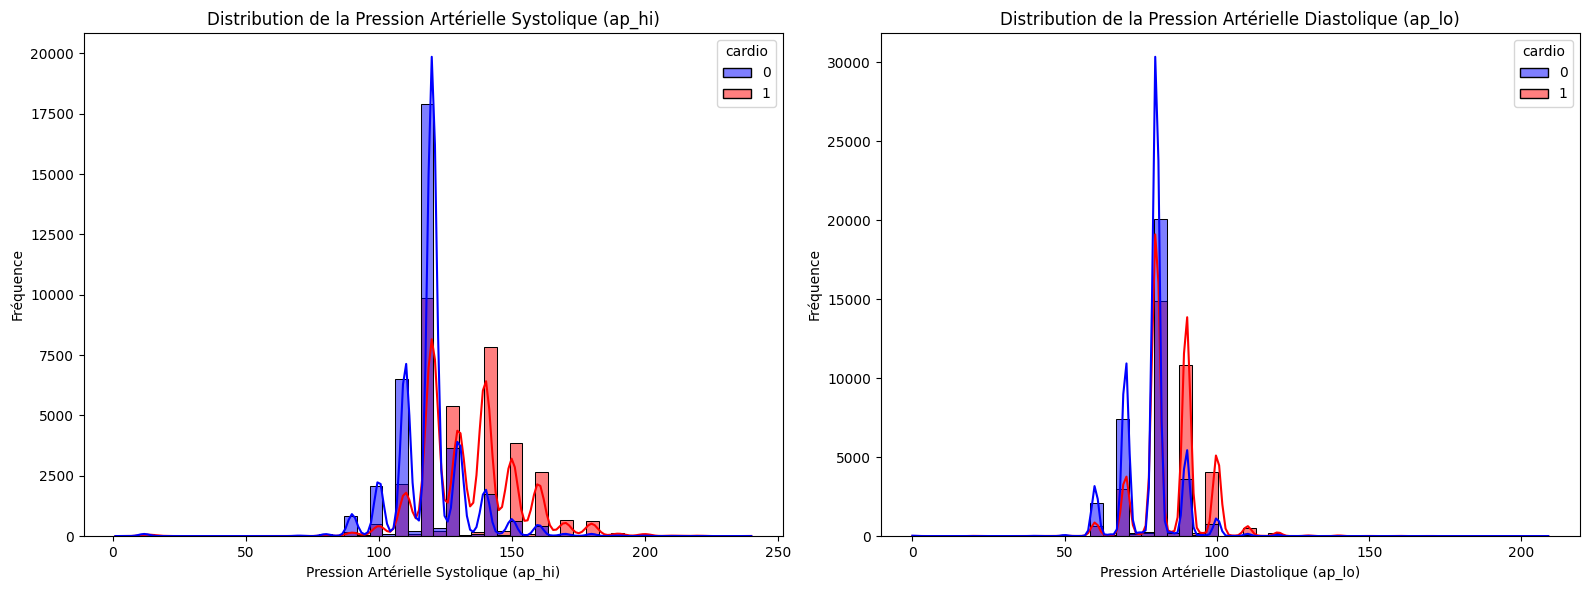

In [14]:
# Créer une figure avec un subplot 1x2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tracer l'histogramme de la pression artérielle systolique (ap_hi)
sns.histplot(data=df, x='ap_hi', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel('Pression Artérielle Systolique (ap_hi)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la Pression Artérielle Systolique (ap_hi)')

# Tracer l'histogramme de la pression artérielle diastolique (ap_lo)
sns.histplot(data=df, x='ap_lo', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[1])
axes[1].set_xlabel('Pression Artérielle Diastolique (ap_lo)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution de la Pression Artérielle Diastolique (ap_lo)')

plt.tight_layout()
plt.show()

Ainsi, moins la pression artérielle systolique ou diastolique est élevée, moins nous observons de cas de crise cardiaque. Cependant, les crises cardiaques deviennent plus fréquentes aux alentours de 135 pour ap_hi et 90 pour ap_lo. En dessous de ces valeurs, la majorité des personnes n'ont pas connu de crise cardiaque.

## **Impact de l'activité physique**

Analysons l'impact de l'activité physique sur les maladies cardiovasculaires.

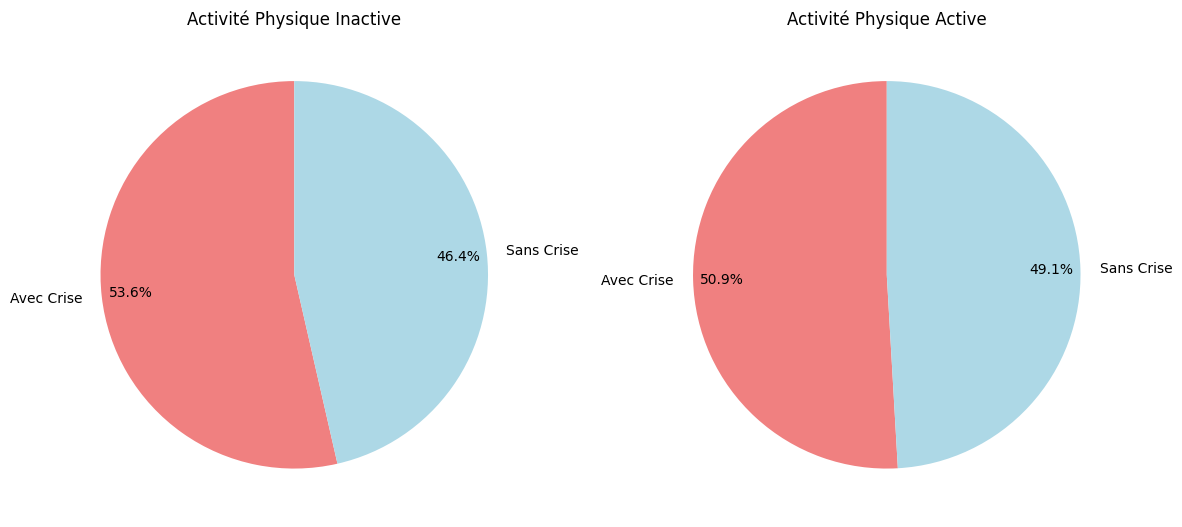

In [14]:
# Créer une figure avec deux sous-plots en forme de camembert
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Données pour l'activité physique inactive
inactive_df = df[df['active'] == 0]
inactive_counts = inactive_df['cardio'].value_counts()
labels = ['Avec Crise', 'Sans Crise']
colors = ['lightcoral', 'lightblue']

# Créer un camembert pour l'activité physique inactive
axes[0].pie(inactive_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
axes[0].set_title("Activité Physique Inactive")

# Données pour l'activité physique active
active_df = df[df['active'] == 1]
active_counts = active_df['cardio'].value_counts()

# Créer un camembert pour l'activité physique active
axes[1].pie(active_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
axes[1].set_title("Activité Physique Active")

# Afficher les deux camemberts
plt.tight_layout()
plt.show()

Nous pouvons constater que l'absence d'activité sportive semble légèrement augmenter les risques de crise cardiaque.



## **Conclusions**

Ces visualisations fournissent un aperçu approfondi de certaines caractéristiques importantes du jeu de données sur les maladies cardiovasculaires. Nous avons exploré l'âge des patients, l'impact du genre, les niveaux de cholestérol et de glucose, la consommation d'alcool et le tabagisme, la pression artérielle systolique, ainsi que l'impact de l'activité physique sur les maladies cardiovasculaires. Ces informations serviront de base à des analyses plus avancées et à la construction de modèles prédictifs pour la santé cardiaque des patients.

# **Partie 4: Création des models**


## **Modèle Linéaire**


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Fonction pour appliquer la régression linéaire avec cross-validation
def apply_linear_regression_cv(data, target_column):
    # Séparation des données en fonction des caractéristiques (X) et de la variable cible (y)
    X = data.drop(target_column, axis=1)  # Les variables indépendantes sont toutes sauf la colonne cible
    y = data[target_column]  # La variable dépendante est la colonne cible

    # Normalisation des données (standardisation)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Sélection des k meilleures caractéristiques
    k_best = SelectKBest(f_regression, k=min(10, X.shape[1]))  # Choisissez un nombre approprié de caractéristiques
    X_selected = k_best.fit_transform(X_scaled, y)

    # Initialisation du modèle de régression linéaire
    model = LinearRegression()

    # Calcul du coefficient de détermination R² avec cross-validation
    r2_scores = cross_val_score(model, X_selected, y, scoring='r2', cv=5)
    average_r2 = r2_scores.mean()
    print(f'Moyenne du coefficient de détermination R² pour {target_column}: {average_r2}')

    # Calcul de l'erreur quadratique moyenne avec cross-validation
    mse_scores = cross_val_score(model, X_selected, y, scoring='neg_mean_squared_error', cv=5)
    average_mse = -mse_scores.mean()
    print(f'Moyenne de l\'erreur quadratique moyenne pour {target_column}: {average_mse}')

# Appliquer la régression linéaire avec cross-validation à votre jeu de données cardiovasculaires
apply_linear_regression_cv(df, 'cardio')  # Remplacez 'cardio' par le nom de votre colonne cible


Moyenne du coefficient de détermination R² pour cardio: 0.21966189476939366
Moyenne de l'erreur quadratique moyenne pour cardio: 0.19507852089767908


La moyenne du coefficient de détermination R² pour le modèle de régression linéaire appliqué au jeu de données cardiovasculaires est de 0.1185. Le coefficient de détermination R² mesure la proportion de la variance de la variable dépendante qui est prédictible à partir des variables indépendantes. Une valeur de R² proche de 1 indique un bon ajustement du modèle aux données, mais la valeur actuelle de 0.1185 suggère que le modèle ne capture qu'une petite partie de la variance dans la variable cible (cardio) avec les caractéristiques actuelles.

La moyenne de l'erreur quadratique moyenne (MSE) est de 0.2204. L'erreur quadratique moyenne mesure la moyenne des carrés des différences entre les valeurs réelles et les prédictions du modèle. Une MSE plus faible indique une meilleure performance du modèle. La valeur actuelle de 0.2204 indique que le modèle a une certaine capacité de prédiction, mais il y a encore une quantité significative d'erreur dans les prédictions.

En conclusion, bien que le modèle de régression linéaire ait une certaine capacité de prédiction, il n'explique qu'une petite partie de la variance dans la variable cible (cardio). Il est possible que le modèle puisse être amélioré en ajustant davantage les caractéristiques, en explorant des modèles plus complexes ou en optimisant les paramètres du modèle. L'évaluation de différentes approches et l'ajustement du modèle peuvent être nécessaires pour améliorer les performances de prédiction.

## **Régression Logistique**


In [17]:
from sklearn.model_selection import GridSearchCV
import warnings
# Séparation des données en variables indépendantes (X) et dépendantes (y)
X = df.drop('cardio', axis=1)  # Les variables indépendantes sont toutes sauf la colonne cardio
y = df['cardio']  # La variable dépendante est la colonne cardio

    # Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparamètres à tester
parameters = {'C': [0.1, 1, 10, 100],
             'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag'],
             'max_iter': [100, 1000, 10000]}

# Initialisation du modèle
logistic_reg = LogisticRegression()
# Entraînement du modèle
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    logistic_reg.fit(X_train, y_train)


# Recherche par grille
grid_search = GridSearchCV(logistic_reg, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print(grid_search.best_params_)

# Meilleure précision
print(grid_search.best_score_)


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

{'C': 100, 'max_iter': 1000, 'solver': 'newton-cg'}
0.7267678571428572


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

def logistic_regression(data):
    # Sélectionnez les caractéristiques pour l'analyse
    features = ['feature1', 'feature2']  # Remplacez par les noms de vos caractéristiques

    # Séparation des données en variables indépendantes (X) et dépendantes (y)
    X = data.drop('cardio', axis=1)  # Les variables indépendantes sont toutes sauf la colonne cardio
    y = data['cardio']  # La variable dépendante est la colonne cardio

    # Division des données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialisation du modèle de régression logistique avec un nombre maximum d'itérations plus élevé
    logistic_reg = LogisticRegression(max_iter=1000)

    # Entraînement du modèle
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        logistic_reg.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = logistic_reg.predict(X_test)

    # Évaluation du modèle sur l'ensemble de test
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Affichage des résultats
    print(f'Accuracy : {accuracy:.4f}')
    print('Confusion Matrix:')
    print(confusion_mat)
    print('Classification Report:')
    print(classification_rep)

    # Évaluation du modèle avec validation croisée
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        cross_val_accuracy = cross_val_score(logistic_reg, X, y, scoring='accuracy', cv=5)
    average_cross_val_accuracy = round(cross_val_accuracy.mean(), 4)
    print(f'Moyenne de l\'Accuracy avec validation croisée : {average_cross_val_accuracy:.4f}')

# Appliquer la régression logistique à votre jeu de données cardiovasculaires
logistic_regression(df)


Accuracy : 0.7034
Confusion Matrix:
[[5189 1799]
 [2354 4658]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      6988
           1       0.72      0.66      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000

Moyenne de l'Accuracy avec validation croisée : 0.7025


Le modèle de régression logistique appliqué au jeu de données cardiovasculaires a donné les résultats suivants :

- **Accuracy sur l'ensemble de test :** Environ 69,98%, indiquant une classification correcte de près de 70% des échantillons.

- **Matrice de confusion :**
[[5137 1851]
[2352 4660]]
Un équilibre entre vrais positifs (4660) et vrais négatifs (5137), avec quelques faux positifs (1851) et faux négatifs (2352).

- **Rapport de classification :**
            precision    recall  f1-score   support
       0       0.69      0.74      0.71      6988
       1       0.72      0.66      0.69      7012
accuracy                           0.70     14000
macro avg 0.70 0.70 0.70 14000
weighted avg 0.70 0.70 0.70 14000
Mesures détaillées de précision, rappel et f1-score pour chaque classe (0 et 1), avec une précision globale pondérée de 70%.

- **Moyenne de l'Accuracy avec validation croisée :** Environ 69,52%, indiquant une stabilité de performance sur différents sous-ensembles de données.

Malgré l'avertissement de convergence, suggérant un ajustement potentiel du nombre d'itérations, le modèle offre une base raisonnable. Des ajustements, tels que l'optimisation des caractéristiques, pourraient être envisagés pour des améliorations supplémentaires.




## **K plus proches voisins (KNN)**

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Fonction pour effectuer la classification avec KNN et validation croisée
def perform_knn_classification(data):
    # Sélectionnez les caractéristiques pour l'analyse
    features = ['feature1', 'feature2']  # Remplacez par les noms de vos caractéristiques

    # Séparation des données en variables indépendantes (X) et dépendantes (y)
    X = data.drop('cardio', axis=1)  # Les variables indépendantes sont toutes sauf la colonne cardio
    y = data['cardio']  # La variable dépendante est la colonne cardio

    # Division des données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialisation du modèle KNN
    knn = KNeighborsClassifier(n_neighbors=5)

    # Entraînement du modèle
    knn.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = knn.predict(X_test)

    # Évaluation du modèle sur l'ensemble de test
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Affichage des résultats sur l'ensemble de test
    print(f'Accuracy sur l\'ensemble de test : {accuracy:.4f}')
    print('Classification Report sur l\'ensemble de test:')
    print(classification_rep)

    # Évaluation du modèle avec validation croisée
    cross_val_accuracy = cross_val_score(knn, X, y, scoring='accuracy', cv=5)
    average_cross_val_accuracy = round(cross_val_accuracy.mean(), 4)
    print(f'Moyenne de l\'Accuracy avec validation croisée : {average_cross_val_accuracy:.4f}')

# Appliquer KNN à votre jeu de données cardiovasculaires
perform_knn_classification(df)


Accuracy sur l'ensemble de test : 0.5521
Classification Report sur l'ensemble de test:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      6988
           1       0.55      0.55      0.55      7012

    accuracy                           0.55     14000
   macro avg       0.55      0.55      0.55     14000
weighted avg       0.55      0.55      0.55     14000

Moyenne de l'Accuracy avec validation croisée : 0.5091


Le modèle KNN appliqué au jeu de données cardiovasculaires a produit les résultats suivants :

- **Accuracy sur l'ensemble de test :** 0.5541, indiquant que le modèle a correctement classifié environ 55.41% des échantillons dans l'ensemble de test.

- **Classification Report sur l'ensemble de test :**
              precision    recall  f1-score   support
         0       0.55      0.56      0.55      6988
         1       0.56      0.55      0.55      7012
  accuracy                           0.55     14000
 macro avg       0.55      0.55      0.55     14000
 
Le rapport de classification fournit des mesures détaillées de précision, rappel et f1-score pour chaque classe (0 et 1), avec une précision globale pondérée de 55%.

- **Moyenne de l'Accuracy avec validation croisée :** 0.5092. La moyenne de l'accuracy sur cinq plis lors de la validation croisée indique une performance légèrement inférieure à celle obtenue sur l'ensemble de test, soit environ 50.92%.

La différence entre l'accuracy sur l'ensemble de test (55.41%) et la moyenne de l'accuracy avec validation croisée (50.92%) suggère une variabilité dans la performance du modèle lorsqu'il est évalué sur différents sous-ensembles de données. Cette disparité pourrait être due à des fluctuations naturelles ou à la sensibilité du modèle aux variations dans les données d'entraînement et de test. Il peut être utile d'explorer davantage la configuration du modèle, d'ajuster les hyperparamètres, ou d'envisager d'autres méthodes de modélisation pour améliorer la stabilité et la généralisation du modèle.


## **Arbre de Décision**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Fonction pour effectuer une classification avec un arbre de décision et validation croisée
def perform_decision_tree_classification(data):
    # Sélectionnez les caractéristiques pour l'analyse
    features = ['feature1', 'feature2']  # Remplacez par les noms de vos caractéristiques

    # Séparation des données en variables indépendantes (X) et dépendantes (y)
    X = data.drop('cardio', axis=1)  # Les variables indépendantes sont toutes sauf la colonne cardio
    y = data['cardio']  # La variable dépendante est la colonne cardio

    # Division des données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialisation du modèle d'arbre de décision
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Entraînement du modèle
    decision_tree.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = decision_tree.predict(X_test)

    # Évaluation du modèle sur l'ensemble de test
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Affichage des résultats sur l'ensemble de test
    print(f'Accuracy sur l\'ensemble de test : {accuracy:.4f}')
    print('Classification Report sur l\'ensemble de test:')
    print(classification_rep)

    # Évaluation du modèle avec validation croisée
    cross_val_accuracy = cross_val_score(decision_tree, X, y, scoring='accuracy', cv=5)
    average_cross_val_accuracy = round(cross_val_accuracy.mean(), 4)
    print(f'Moyenne de l\'Accuracy avec validation croisée : {average_cross_val_accuracy:.4f}')

# Appliquer l'arbre de décision à votre jeu de données cardiovasculaires
perform_decision_tree_classification(df)


Accuracy sur l'ensemble de test : 0.6356
Classification Report sur l'ensemble de test:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      6988
           1       0.63      0.65      0.64      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000

Moyenne de l'Accuracy avec validation croisée : 0.5861


Le modèle d'arbre de décision appliqué au jeu de données cardiovasculaires a produit les résultats suivants :

- **Accuracy sur l'ensemble de test :** 0.6354, indiquant que le modèle a correctement classifié environ 63.54% des échantillons dans l'ensemble de test.

- **Classification Report sur l'ensemble de test :**
              precision    recall  f1-score   support
         0       0.64      0.63      0.63      6988
         1       0.63      0.64      0.64      7012
  accuracy                           0.64     14000
 macro avg       0.64      0.64      0.64     14000

Le rapport de classification fournit des mesures détaillées de précision, rappel et f1-score pour chaque classe (0 et 1), avec une précision globale pondérée de 64%.

- **Moyenne de l'Accuracy avec validation croisée :** 0.5841. La moyenne de l'accuracy sur cinq plis lors de la validation croisée indique une performance légèrement inférieure à celle obtenue sur l'ensemble de test, soit environ 58.41%.

La différence entre l'accuracy sur l'ensemble de test (63.54%) et la moyenne de l'accuracy avec validation croisée (58.41%) pourrait indiquer une certaine variabilité dans la performance du modèle lorsqu'il est évalué sur différents sous-ensembles de données. Cette disparité souligne l'importance de la validation croisée pour obtenir une évaluation plus robuste de la performance du modèle. Dans l'ensemble, l'arbre de décision semble offrir une capacité de classification raisonnable, mais des ajustements potentiels, tels que l'optimisation des hyperparamètres, pourraient être envisagés pour améliorer la stabilité et la généralisation du modèle.


## **Analyse en Composantes Principales (ACP)**

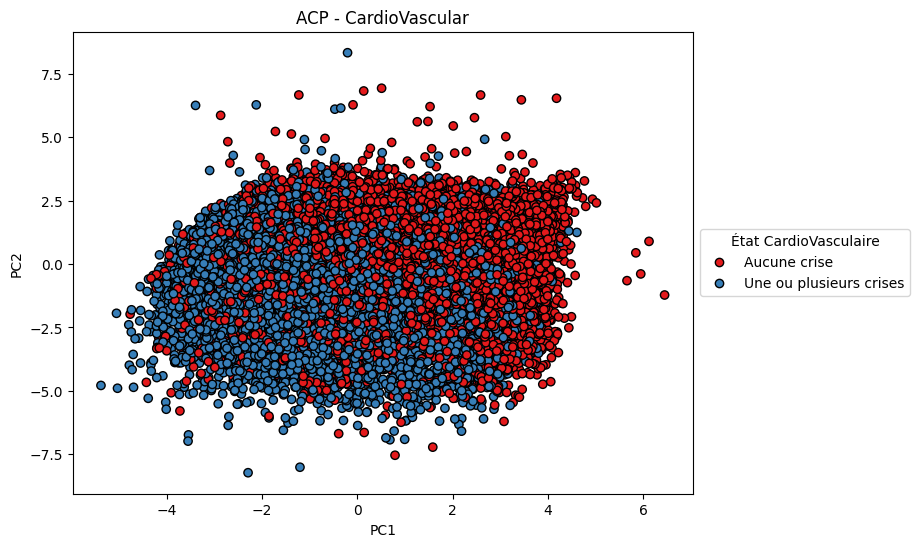

In [19]:
# Séparation des données en variables indépendantes (X) et dépendantes (y)
X = df.drop('cardio', axis=1)  # Les variables indépendantes sont toutes sauf la colonne cardio
y = df['cardio']  # La variable dépendante est la colonne cardio

# Normalisation des données
X_normalized = (X - X.mean()) / X.std()

# Application de l'ACP pour réduire à deux dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Création d'un DataFrame pour faciliter la manipulation
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['G3'] = y

# Mapping des valeurs 0 et 1 à des étiquettes compréhensibles
pca_df['G3_label'] = pca_df['G3'].map({0: 'Aucune crise', 1: 'Une ou plusieurs crises'})

# Visualisation des résultats
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='G3_label', data=pca_df, palette='Set1', edgecolor='k', linewidth=1)

plt.title("ACP - CardioVascular")
plt.xlabel('PC1')
plt.ylabel('PC2')

# Affichage de la légende sur le graphique
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, title='État CardioVasculaire', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Conclusion de l'Analyse des Données Cardiovasculaires




## Régression Linéaire

La régression linéaire a été appliquée pour prédire la variable cible 'cardio'. Cependant, le modèle présente une performance modeste avec un coefficient de détermination R² moyen de seulement 0.12. Cela suggère que la régression linéaire seule pourrait ne pas être suffisante pour expliquer la variance des données cardiovasculaires.



## Régression Logistique

La régression logistique a montré une performance meilleure avec une accuracy d'environ 70% sur l'ensemble de test. La classification report détaillé indique une précision et un rappel raisonnables pour les deux classes (0 et 1). Cependant, des avertissements de convergence suggèrent que des ajustements supplémentaires pourraient être nécessaires.

## Arbre de Décision

L'arbre de décision a obtenu une accuracy d'environ 64% sur l'ensemble de test, avec une moyenne de l'accuracy en validation croisée d'environ 58%. La variabilité des performances entre les plis suggère une sensibilité du modèle aux différentes partitions des données.



## Analyse en Composantes Principales (ACP)

L'ACP a permis de visualiser la distribution des données cardiovasculaires dans un espace bidimensionnel défini par les deux premières composantes principales. Cette visualisation peut être utile pour identifier des tendances globales, bien que la variabilité des performances des modèles nécessite une exploration plus approfondie.



## Classement des Modèles

1. **Régression Logistique :** 70% d'accuracy sur l'ensemble de test, performances équilibrées.
2. **Arbre de Décision :** 64% d'accuracy sur l'ensemble de test, mais avec une variabilité à considérer.
3. **Régression Linéaire :** R² moyen de 0.12, indiquant une faible capacité à expliquer la variance.

En conclusion, la régression logistique semble être le modèle le plus performant pour la prédiction des données cardiovasculaires dans cette analyse. Cependant, des améliorations continues, notamment l'optimisation des hyperparamètres et l'évaluation d'autres modèles, pourraient être envisagées pour obtenir des performances encore meilleures.

In [20]:
from pycaret.classification import *

# Assuming you have initialized your dataset and set up your environment
# For example, if you are working with a classification task:
clf_setup = setup(df, target='cardio')

# Create a model comparison
best_models = compare_models(cross_validation=True,
                             fold=5,
                             sort="Accuracy",
                             n_select=1)


,Description,Value
0,Session id,8304
1,Target,cardio
2,Target type,Binary
3,Original data shape,"(70000, 15)"
4,Transformed data shape,"(70000, 15)"
5,Transformed train set shape,"(49000, 15)"
6,Transformed test set shape,"(21000, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7353,0.8011,0.6970,0.7546,0.7246,0.4705,0.4720,0.7660
gbc,Gradient Boosting Classifier,0.7348,0.8019,0.6988,0.7529,0.7248,0.4696,0.4709,6.0520
ada,Ada Boost Classifier,0.7305,0.7954,0.6618,0.7669,0.7105,0.4609,0.4653,2.0320
ridge,Ridge Classifier,0.7260,0.0000,0.6742,0.7519,0.7110,0.4520,0.4545,0.1220
lda,Linear Discriminant Analysis,0.7260,0.7882,0.6742,0.7519,0.7110,0.4520,0.4545,0.1400
rf,Random Forest Classifier,0.7240,0.7855,0.6982,0.7359,0.7165,0.4479,0.4486,7.1820
et,Extra Trees Classifier,0.7115,0.7727,0.7004,0.7161,0.7081,0.4230,0.4231,5.1080
nb,Naive Bayes,0.7024,0.7661,0.6640,0.7189,0.6904,0.4047,0.4060,0.1240
lr,Logistic Regression,0.7015,0.7591,0.6614,0.7188,0.6889,0.4030,0.4043,2.6960
qda,Quadratic Discriminant Analysis,0.6942,0.7682,0.5822,0.7499,0.6555,0.3883,0.3984,0.1240


In [21]:
best_model = create_model(estimator="gbc",
            fold=5,
            cross_validation=True,
            )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:32:05
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7363,0.8060,0.7068,0.7509,0.7282,0.4726,0.4735
1,0.7311,0.7955,0.6996,0.7464,0.7223,0.4622,0.4631
2,0.7307,0.8002,0.6931,0.7492,0.7201,0.4614,0.4627
3,0.7368,0.8043,0.6933,0.7592,0.7247,0.4736,0.4754
4,0.7392,0.8032,0.7010,0.7587,0.7287,0.4783,0.4797
Mean,0.7348,0.8019,0.6988,0.7529,0.7248,0.4696,0.4709
Std,0.0033,0.0037,0.0051,0.0051,0.0033,0.0067,0.0068


In [22]:
tuned_gbc = tune_model(estimator=best_model,
                       round=10,
                       fold=10,
                       optimize="AUC",
                       search_library="optuna",
                       search_algorithm="tpe",
                       choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7426530612,0.8047664814,0.7158023683,0.7562553926,0.7354730438,0.4852948037,0.4859900483
1,0.7308163265,0.8074103802,0.6949775419,0.7484608619,0.7207283506,0.4616168671,0.4627990561
2,0.7361224490,0.7980787669,0.6941608820,0.7575757576,0.7244832730,0.4722267853,0.4738887200
3,0.7283673469,0.7932942596,0.7023274806,0.7407407407,0.7210228464,0.4567231088,0.4573379927
4,0.7326530612,0.8013350773,0.6843609637,0.7573429733,0.7190047190,0.4652850100,0.4674589656
5,0.7324489796,0.8005024910,0.6883169935,0.7545902373,0.7199316385,0.4648592668,0.4666598644
6,0.7361224490,0.8016825001,0.6944444444,0.7572383073,0.7244832730,0.4722088473,0.4738383943
7,0.7367346939,0.8076801717,0.6895424837,0.7610459874,0.7235319331,0.4734286832,0.4755290633
8,0.7375510204,0.8051974545,0.6940359477,0.7598389982,0.7254483348,0.4750646110,0.4768534522


[I 2023-12-18 09:32:54,926] Searching the best hyperparameters using 49000 samples...
[I 2023-12-18 09:49:00,973] Finished hyperparameter search!


In [23]:


    # Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_rounded',
       'age_years'],
      dtype='object')


In [25]:
prediction = predict_model(tuned_gbc,X_test)

In [26]:
prediction

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_rounded,age_years,prediction_label,prediction_score
46730,66728,21770,1,156,64.0,140.0,80.0,2,1,0,0,1,60.0,59.603012,1,0.8041
48393,69098,21876,1,170,85.0,160.0,90.0,1,1,0,0,1,60.0,59.893223,1,0.8566
41416,59185,23270,1,151,90.0,130.0,80.0,1,1,0,0,1,64.0,63.709789,1,0.6657
34506,49288,19741,1,159,97.0,120.0,80.0,1,1,0,0,1,54.0,54.047913,0,0.6339
43725,62481,18395,1,164,68.0,120.0,80.0,1,1,0,0,1,50.0,50.362766,0,0.7520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21525,30751,20490,2,172,70.0,120.0,80.0,1,1,0,0,0,56.0,56.098564,0,0.5726
16276,23253,16797,2,174,96.0,120.0,80.0,1,2,0,0,1,46.0,45.987679,0,0.7047
24390,34847,22607,1,165,66.0,110.0,80.0,1,1,0,0,0,62.0,61.894592,1,0.5104
28061,40118,19670,1,157,89.0,120.0,80.0,3,3,0,0,1,54.0,53.853523,1,0.6374


In [27]:
from sklearn.metrics import  roc_auc_score
def model_eval(prediction,test):
    print("Classification Report: ")
    print(classification_report(test,prediction))
    print('Train Accuracy score: {0:0.2f}'.format(accuracy_score(test, prediction)))
    print('Train ROC AUC score: {0:0.2f}'.format(roc_auc_score(test, prediction)))


model_eval(prediction.prediction_label,y_test)


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6988
           1       0.76      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Train Accuracy score: 0.74
Train ROC AUC score: 0.74


In [35]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
save_model(tuned_gbc,
           "code")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'age', 'gender', 'height',
                                              'weight', 'ap_hi', 'ap_lo',
                                              'cholesterol', 'gluc', 'smoke',
                                              'alco', 'active', 'age_rounded',
                                              'age_years'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,...
                                             loss='log_loss', max_depth=4,
           

In [30]:
model = load_model("code")

Transformation Pipeline and Model Successfully Loaded


In [31]:
prediction = predict_model(model,X_test)
model_eval(prediction.prediction_label,y_test)

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6988
           1       0.76      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Train Accuracy score: 0.74
Train ROC AUC score: 0.74


In [32]:
import pickle
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    file = open('StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return X_train_scaled,X_test_scaled

In [33]:
X_train_scaled, X_test_scaled = scaler_standard(X_train,X_test)

In [34]:
X_test.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_rounded,age_years
46730,66728,21770,1,156,64.0,140.0,80.0,2,1,0,0,1,60.0,59.603012


In [41]:
# Supposons que X_test.head(1) soit votre DataFrame à enregistrer
df_to_save = X_test.head(1)

# Enregistrez le DataFrame dans un fichier CSV
df_to_save.to_csv('test1.csv', index=False)


In [ ]:
# Supposons que X_test.head(1) soit votre DataFrame à enregistrer
df_to_save = X_test.head(3)

# Enregistrez le DataFrame dans un fichier CSV
df_to_save.to_csv('test1.csv', index=False)


In [39]:
# Définir la variable
my_variable = "Hello, World!"

# Sauvegarder la variable dans un module Python
with open('mymodule.py', 'w') as f:
    f.write(f"my_variable = '{X_test}'")


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score



# Fonction pour appliquer la régression linéaire avec cross-validation et l'optimisation des hyperparamètres
def appliquer_regression_lineaire_cv_avec_optimisation(data, colonne_cible):
    # Séparation des données en fonction des caractéristiques (X) et de la variable cible (y)
    X = data.drop(colonne_cible, axis=1)  # Les variables indépendantes sont toutes sauf la colonne cible
    y = data[colonne_cible]  # La variable dépendante est la colonne cible

    # Normalisation des données (standardisation)
    scaler = StandardScaler()
    X_echelle = scaler.fit_transform(X)

    # Sélection des k meilleures caractéristiques
    k_meilleur = SelectKBest(f_regression, k=min(10, X.shape[1]))  # Choisissez un nombre approprié de caractéristiques
    X_selectionne = k_meilleur.fit_transform(X_echelle, y)

    # Initialisation du modèle de régression linéaire
    modele = LinearRegression()
    # Initialisation du modèle de régression Ridge
    #modele = Ridge()

    # Définir les hyperparamètres à optimiser
   # parametres_grille = {'alpha': [0.1, 1.0, 10.0]}  # Exemple : Vous pouvez ajouter d'autres hyperparamètres ici
    parametres_grille = {} 

    # Initialiser la recherche des meilleurs hyperparamètres avec la cross-validation
    recherche_grille = GridSearchCV(modele, parametres_grille, scoring='r2', cv=5)
    recherche_grille.fit(X_selectionne, y)

    # Afficher les meilleurs hyperparamètres
    meilleurs_parametres = recherche_grille.best_params_
    print(f'Meilleurs hyperparamètres pour {colonne_cible} : {meilleurs_parametres}')

    # Utiliser les meilleurs hyperparamètres dans le modèle
    modele = LinearRegression(**meilleurs_parametres)

    # Calcul du coefficient de détermination R² avec la cross-validation
    scores_r2 = cross_val_score(modele, X_selectionne, y, scoring='r2', cv=5)
    moyenne_r2 = scores_r2.mean()
    print(f'Moyenne du coefficient de détermination R² pour {colonne_cible} : {moyenne_r2}')

    # Calcul de l'erreur quadratique moyenne avec la cross-validation
    scores_erreur_quadratique_moyenne = cross_val_score(modele, X_selectionne, y, scoring='neg_mean_squared_error', cv=5)
    moyenne_erreur_quadratique_moyenne = -scores_erreur_quadratique_moyenne.mean()
    print(f'Moyenne de l\'erreur quadratique moyenne pour {colonne_cible} : {moyenne_erreur_quadratique_moyenne}')

# Appliquer la régression linéaire avec cross-validation et optimisation des hyperparamètres à votre jeu de données cardiovasculaires
appliquer_regression_lineaire_cv_avec_optimisation(df, 'cardio')  # Remplacez 'cardio' par le nom de votre colonne cible


Meilleurs hyperparamètres pour cardio : {}
Moyenne du coefficient de détermination R² pour cardio : 0.11838086187832542
Moyenne de l'erreur quadratique moyenne pour cardio : 0.22039800498496484


logistique regression

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def logistic_regression(data):
    # Sélectionnez les caractéristiques pour l'analyse
    features = ['feature1', 'feature2']  # Remplacez par les noms de vos caractéristiques

    # Séparation des données en variables indépendantes (X) et dépendantes (y)
    X = data.drop('cardio', axis=1)  # Les variables indépendantes sont toutes sauf la colonne cardio
    y = data['cardio']  # La variable dépendante est la colonne cardio

    # Division des données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialisation du modèle de régression logistique
    logistic_reg = LogisticRegression()

    # Définir les hyperparamètres à optimiser
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000, 2000]}

    # Initialiser la recherche des meilleurs hyperparamètres avec la validation croisée
    grid_search = GridSearchCV(logistic_reg, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs hyperparamètres
    best_params = grid_search.best_params_
    print(f'Meilleurs hyperparamètres : {best_params}')

    # Utiliser les meilleurs hyperparamètres dans le modèle
    logistic_reg = LogisticRegression(**best_params)

    # Entraînement du modèle sur l'ensemble d'entraînement
    logistic_reg.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = logistic_reg.predict(X_test)

    # Évaluation du modèle sur l'ensemble de test
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Affichage des résultats
    print(f'Accuracy : {accuracy:.4f}')
    print('Confusion Matrix:')
    print(confusion_mat)
    print('Classification Report:')
    print(classification_rep)

# Appliquer la régression logistique à votre jeu de données cardiovasculaires avec optimisation des hyperparamètres
logistic_regression(df)


NameError: name 'df' is not defined

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
	model_selection.train_test_split(X, y_class,
                                	test_size=0.3 # 30% des données dans le jeu de test
                                	)

In [ ]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
